# **NLP course  -   Research Master Business Data Science**

*by Meike Morren and Bas Donkers*

Inspired by: 
* https://www.depends-on-the-definition.com/introduction-n-gram-language-models/ (spaCy)
* https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/ (textblob)
* http://rwet.decontextualize.com/book/textblob/ (textblob and wordnet)
* https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4 (overview sentiment analysis)

This week, we will analyze the sentences gathered in week 1. The main goal is to show you how to use python to analyze N-grams and sentiment of the reviews. 

In [2]:
# before we start, retrieve data from other notebook
%store -r df_sent

## N-grams
We will work with `TextBlob` which builds on `NLTK` and `pattern`, but there are many other packages available (see for instance `spaCy`). In order to analyze text, we need to break down the sentences. This way, we can easily check whether sentence parts are frequently used or not. The most simple N-gram is the unigram, where each word is analyzed separately. 
So to calculate the probability of word $w_{i}$ given the other words $w$ in a sentence, you would use this formula:

\begin{equation*}
    {P}(w_{i} \vert w_{i-n},...,w_{i-2},w_{i-1}) = \frac{Count(w_{i-n}...w_{i-2}w_{i-1}w_{i})}{Count(w_{i})}
    %{P}(w_{1}^{n}) = \prod_{k=1}^{n} {P}(w_{k} \vert w_{k-N-1}^{k-1})%
\end{equation*}

However most often you would make use of bigrams (two words) or trigrams (three words). If applied to a bi-gram this equation changed to:
\begin{equation*}
    {P}(w_{i} \vert w_{i-1}) = \frac{Count(w_{i-1}w_{i})}{Count(w_{i})}
    %{P}(w_{i} \vert w_{1}w_{2}...w_{i-1}) = {P}(w_{i} \vert w_{i-1})%
\end{equation*}

For a graphical demonstration of creating bigrams, see the picture below (from spaCy blog).

![caption](files/images/Ngram-language-model-explained-with-examples.png)

To decide on unigrams, bigrams, or trigrams, you need to consider the size of the vocabulary. The space an n-gram requires is exponential, so the larger the N-gram, the more data you would need:
\begin{equation*}
    n(w-2(n-1))+\sum _{i=1}^{n-1}2i\qquad n,w\in {\mathcal {N}}
\end{equation*}
        
where each word $w$ in vocabulary $N$ is considered to be part of a n-gram of size $n$. 

For bigrams, each word combination is created. This means that before we start to divide the data into n-grams, we need to tokenize each sentence (see week 1). Ofcourse we could easily create a function ourselves, but textblob already has many possibilities. When you create a textblob, this is already tokenized, and can be used for n-grams, pos tagging, correct spelling and many other NLP tasks. 


In [3]:
# install packages
#Anaconda: conda install -c conda-forge textblob
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.sentiments import PatternAnalyzer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk import word_tokenize
from nltk.corpus import wordnet 
nltk.download('wordnet')
nltk.download('brown')
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\MP\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\MP\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
len(TextBlob(df_sent.sentence.loc[1])) # 80 characters
len(TextBlob(df_sent.sentence.loc[1]).words) # 15 words

15

In [5]:
# create n-grams
TextBlob(df_sent.sentence.loc[1]).ngrams(n=2)

[WordList(['Really', 'great']),
 WordList(['great', 'Dutch']),
 WordList(['Dutch', 'food']),
 WordList(['food', 'felt']),
 WordList(['felt', 'like']),
 WordList(['like', 'I']),
 WordList(['I', 'was']),
 WordList(['was', 'eating']),
 WordList(['eating', 'at']),
 WordList(['at', 'my']),
 WordList(['my', 'Dutch']),
 WordList(['Dutch', 'grandmother']),
 WordList(['grandmother', 's']),
 WordList(['s', 'house'])]

---

## Parsing
N-grams can be an efficient way to feed text to a classifier. However, more information can be abstracted from text. First, each word has a certain meaning in a sentence. This can be analyzed using tags. Textblob has a parser that analyzes the structure of the sentence, and assigns a tag to each word. Note that these are not always correct! Try to guess the pos tag of *trigger* in the following two sentences:

* Corona might trigger a financial crisis
* Corona might be a trigger for a financial crisis

Clearly in the first sentence *trigger* is a verb while in the second it is a noun. 

In [6]:
TextBlob('Corona might be a trigger for a financial crisis').tags
TextBlob('Corona might trigger a financial crisis').tags

[('Corona', 'NNP'),
 ('might', 'MD'),
 ('trigger', 'VB'),
 ('a', 'DT'),
 ('financial', 'JJ'),
 ('crisis', 'NN')]

In [7]:
# find tags
TextBlob(df_sent.sentence.loc[1]).tags
TextBlob(df_sent.sentence.loc[120]).tags

[('They', 'PRP'),
 ('only', 'RB'),
 ('sell', 'VBP'),
 ('one', 'CD'),
 ('overpriced', 'VBD'),
 ('OVERLY', 'NNP'),
 ('SWEET', 'NNP'),
 ('cookie', 'NN')]

**Capitals matter!** TextBlob analyzes the text, and uses capitals as markers for certain POS taggers. If the word starts with a capital, TextBlob will give it a NN (noun) or NNP (proper nouns (NNP) tag. NNP names specific people, places, things, or ideas.  Since they these nouns are naming specific things, they always begin with a capital letter. If all letters are capitals (see second example above), then TextBlob will also regard these words as proper nouns.

In order to circumvent these tags, you can use only lower case. Although it creates better tags for words that identify countries (such as Dutch food), it might also create problems for names of specific people, things, ideas and places.

---

Using the tags, you can decipher phrases as we discussed in the slides. This means that a set of words are identified as a phrase, a set of words that are connected. The most common one is noun phrases.

In [8]:
# change olav to capitals (or first letter only) to see what happens
TextBlob('this morning olav was playing with lego in a very sweet way').noun_phrases

WordList(['morning olav', 'sweet way'])

In [9]:
# find nouns
TextBlob(df_sent.sentence.loc[1]).noun_phrases

WordList(['really', 'dutch', 'dutch', 'grandmother s house'])

In [10]:
TextBlob(df_sent.sentence.loc[1].lower()).noun_phrases

WordList(['great dutch food', 'dutch grandmother s house'])

In general, computers are not very good at reading human language, and if parsing already poses challenges, the dissection of noun phrases even more! You can play around with many different parsers, but overall you will find that the results are not perfect. 

---

## REGEX
Now lets move on to the corpus that we will use to create the term frequency document matrix. As symbols and words that have only one character are very unlikely to be interesting, usually these are removed from the corpus.

Using the `re` function, you can remove (`re.match`), replace (`re.sub`) or find (`re.findall`) certain symbols, or set of characters in a string. Any type of character or symbol can be searched for. If you want to search for a character or word in a certain position in a string you can use * to mask the rest of the string. So if you would like to find all sentences that start with "The". If you're interested in position, you need to start the pattern with `^` and if you're interested in how the string ends you need to close the pattern with `$`. If you are interested in all possible number (& combinations) you can use `[0-9]`. There are endless possibilities with `re`. Please find a comprehensible overview here: *https://www.w3schools.com/python/python_regex.asp.

* `findall()` will return all occurrences that match a pattern
* `search()` module will only return the first occurrence that matches the pattern
* `match()` checks for a match only at the beginning of the string
* `sub()` matched occurrences are replaced with the content of replace variable
* `\w` will match alphanumeric characters and underscores
* `[^\w]` will match anything that's not alphanumeric or underscore

In [11]:
# all sentences end with great
[s for s in df_sent.sentence if re.search(".*great$",s)] # asterisk means everything else that precedes 'great'

[' That said  we had a great experience-- the food here is great',
 ' It s great',
 ' Yup  it was pretty great',
 ' We thought the prices & quality of the steaks and food were great',
 'Interesting spot in utrecht  The staff are friendly and the food is great',
 'Steak was great',
 '  Service was great',
 'Blossom is simply great',
 'Kibbeling (fried fish  was great',
 ' The staff is very friendly and the service was great',
 '  \nHad the Palak Paneer  which were great',
 'I ve come here three times before and everything was great',
 ' The coffee guide on the walls are a great',
 ' The service was very good and the food was great',
 '\nExcellent value for money and a great',
 'All the food was great',
 ' The food  the drinks  the service was great',
 ' The rice bowls are great',
 ' Atmosphere was also great',
 ' The coffee and service is always great',
 'This place was great',
 'You must go there  the atmosphere was amazing and pizza really great',
 ' The staff is very friendly  very a

In [12]:
s=df_sent.sentence_cleaned.loc[19]
re.findall('^[a-zA-Z]{1}$',s) # find sentences with only one letter, capital or not
re.findall(r"\bhttps:\//[a-z0-9.]*", s) # find https links

re.search('[\n]',s) # find EOL markers
re.search('[\n]+\w',s) # EOL marker followed by letter
re.search('[*]?',s) # find star [] needed to find literally stars

re.sub('\s', '', s) # remove spaces
re.sub('[a-z]', '', s.lower()) # remove letters, first convert to lower case
re.sub(r'"','',s) # r makes sure to also find "
re.sub(r'[^\w]',' ',s) # replace everything but characters with spaces

' I recommend seeing movie  Loving Vincent go familiarize story paintings'

In [13]:
# delete all symbols except characters
df_sent.sentence_cleaned = [re.sub(r'[^\w]',' ',s) for s in df_sent.sentence_cleaned]

In [14]:
# delete all sentences that only contain one character
df_sent.sentence_cleaned = [re.sub('^[a-zA-Z]{1}$','',s) for s in df_sent.sentence_cleaned]

---

## Bag of Words
Next, we create a matrix where each column represents a word and each row corresponds to the text documents (in our case sentences from text documents). This matrix allows us to extract special features from the text. Be aware that this function also deletes the spaces, and the single letters that are left over by the cleaning we have done above.

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
corpus = df_sent.sentence_cleaned[0:100]

BoWVectorizer = CountVectorizer()
BoW_df = pd.DataFrame(BoWVectorizer.fit_transform(corpus).todense())
BoW_df.columns=sorted(BoWVectorizer.vocabulary_)
BoW_df.iloc[:,300:320] # see word 'wow' in first line

,visiting,wait,waiter,waiters,waitlist,walk,walked,warm,waters,way,we,weekday,well,winkel,world,worst,worth,wow,wrong,x2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The main disadvantage of BoW approach are the frequent words that contain little meaning. To avoid this, you could remove the stopwords (see week 1). Note that the count vectorizer cleaned the texts from capitals. See below for the 10 most frequent words in the first 100 sentences.

In [16]:
corpus = df_sent.sentence_cleaned
BoW = CountVectorizer(max_features=10)
BoW_df = pd.DataFrame(BoW.fit_transform(corpus).todense())
BoW_df.columns=sorted(BoW.vocabulary_)
BoW_df

,food,friendly,good,great,nice,one,place,restaurant,service,staff
0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3018,0,0,0,0,0,0,0,0,0,0
3019,0,0,0,0,0,0,0,0,0,0
3020,0,0,0,0,0,0,0,0,0,0
3021,0,0,0,0,0,0,0,0,0,0


In [17]:
from collections import Counter 
# remove words that are single characters
tokens_corpus = [token for s in df_sent.sentence_cleaned for token in word_tokenize(s) if len(token) > 1] 
len(Counter(tokens_corpus)) # 3896 unique words in vocabulary

3953

---

## TF-IDF
Another way to deal with frequent words is to use the Term Frequency (TF) per document. This is summarized in the term frequency - document matrix where each frequency relates to term *t* in document *d*. How often term $t$ occurs in document $d$ and all documents of $D$, you can use the inverse fraction of documents:
        \begin{equation*}
            idf(t,D) = log \frac{N}{1 + \lvert \left\{d \in D : t \in D \right\}\rvert}
        \end{equation*}
To prevent bias towards larger documents:
\begin{equation*}
    tf(t,d) = 0.5 + 0.5 \cdot \frac{f_{t,d}}{max \left\{f_{t',d} : t^\prime \in d  \right\}}
\end{equation*}
Hence, the `TfidfVectorizer` does two things: transform the data to a term - frequency matrix, and calculate the frequency of terms across documents. It uses a log transformation (`fit_transform()`), and adds one (laplace smoothing) to make sure that words with an idf score of zero are not surpressed entirely (fit function actived when running `TfidfVectorizer()`). For more information see: https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_df = pd.DataFrame(tfidf.fit_transform(corpus).todense())
tfidf_df.columns=sorted(tfidf.vocabulary_)
tfidf_df

,00,10,100,11,1150,12,13,15,150,1587,...,yum,yummy,yup,yuuuup,zeezicht,zero,zot,zucchini,zwaan,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The zeros mean that these words are present in multiple reviews, while the numbers different from zero represent words that only appear in that document (i.e. sentence).

---

## Lemmatization, Stemming & WordNet
Many words spring from the same stem, i.e. the part of the word to which affixes can be attached. Stems have lexical meaning. For example, the English word *friendships* contains the stem *friend*. Words having the same stem often share meaning. Stems do not need to be actual words.

In [19]:
sentence = df_sent.sentence[1].lower()
ps_stemmer = PorterStemmer()
' '.join([ps_stemmer.stem(word) for word in word_tokenize(sentence)])

'realli great dutch food felt like i wa eat at my dutch grandmoth s hous'

Sometimes stemming is limited as the algorithms just cut off the end or beginning of a word (based on a list of common prefixes and suffixes that can be found). Lemmatization takes into consideration the morpholical analysis of the words. It looks through detailed dictionaries to link the form back to its lemma. 

In [20]:
lemmatizer = WordNetLemmatizer()
' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(sentence)])

'really great dutch food felt like i wa eating at my dutch grandmother s house'

The advantage of lemmatized words, is that you can easily find other words that are related. These are called synsets and are stored in WordNet, an enormous endeavour by many researchers to document the available words in English language and how they are related to one another. Synsets describe words that are similar in meaning. To learn more about synsets, you can use wordnet which is integrated with textblob. This might be useful, if you would like to take into account the multiple meanings of the word 'bank' for instance. 

In [21]:
syn=wordnet.synsets('bank')
for k in range(0,len(syn)):
    print(k, syn[k].definition(),', example:', syn[k].examples()) 

0 sloping land (especially the slope beside a body of water) , example: ['they pulled the canoe up on the bank', 'he sat on the bank of the river and watched the currents']
1 a financial institution that accepts deposits and channels the money into lending activities , example: ['he cashed a check at the bank', 'that bank holds the mortgage on my home']
2 a long ridge or pile , example: ['a huge bank of earth']
3 an arrangement of similar objects in a row or in tiers , example: ['he operated a bank of switches']
4 a supply or stock held in reserve for future use (especially in emergencies) , example: []
5 the funds held by a gambling house or the dealer in some gambling games , example: ['he tried to break the bank at Monte Carlo']
6 a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force , example: []
7 a container (usually with a slot in the top) for keeping money at home , example: ['the coin bank was empty']


To avoid separately analyzing words with similar meaning, you could stem or lemmatize all words in your corpus. Ofcourse this deletes information, so if you think there is valuable information of whether a word is a verb or noun, you should not stem or lemmatize. In most cases, if you have enough data, it might be better to analyze the words as they are. However, in small datasets, you need to limit the vocabulary size, for which lemmatization and stemming can be very useful.

---

## Sentiment
To analyze sentiment, you can use rule based methods (such as textblob, or vader) or we can use feature-based mehods such as the Naive Bayes classifier, Support Vector Machines classifier, or the pattern classifier. The advantage of rule-based methods is that they are simple and easy to follow. The downside is that the rules may be too simplistic to pick up the subtitles of human langauge (think of comments that both include positive and negative sentiments). The default in TextBlob is the Pattern Analyzer, which is based on the pattern package. Note that if the polarity is >0, it is considered positive, <0 -is considered negative and ==0 is considered neutral. The Naive Bayes classifier in TextBlob is build on the NLTK package and is trained on IMDB dataset.

In [22]:
print(df_sent.sentence.loc[1])
TextBlob(df_sent.sentence.loc[1]).sentiment

 Really great Dutch food  felt like I was eating at my Dutch grandmother s house


Sentiment(polarity=0.8, subjectivity=0.75)

In [23]:
# negative sentiment with textblob, naive bayes
TextBlob(df_sent.sentence.loc[1], analyzer=NaiveBayesAnalyzer()).sentiment

# polarity and subjectivity with textblob, pattern analyzer
TextBlob(df_sent.sentence.loc[1], analyzer=PatternAnalyzer()).sentiment

# negative example
TextBlob(df_sent.sentence.loc[7], analyzer=NaiveBayesAnalyzer()).sentiment
TextBlob(df_sent.sentence.loc[7], analyzer=PatternAnalyzer()).sentiment[0]

-0.5833333333333334

In [24]:
# in some cases vader is better  at finding subtle meanings of sentences
vader = SentimentIntensityAnalyzer()
[print(s, vader.polarity_scores(s)) for s in df_sent.sentence[0:10]]

Wow  this place is just so real and authentic {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.5859}
 Really great Dutch food  felt like I was eating at my Dutch grandmother s house {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.7841}
 As K and I were here on a {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Should be 1 star but friendly service 2 stars {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.6486}
  
Food here is atrocious  the worst restaurant I ve had in Amsterdam by a LONG SHOT {'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compound': -0.6249}
 Any menu with multiple {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Excellent service and food {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}
 You can t really go wrong with Dutch home cooking {'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.5233}
  
The pea soup was delightful {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.5859}
 I got the meatball with three different types 

[None, None, None, None, None, None, None, None, None, None]

In [25]:
# add these findings to the dataset and relate them to rating.
df_sent['polarity'] = [TextBlob(s, analyzer=PatternAnalyzer()).sentiment[0] for s in df_sent.sentence]
df_sent['subjectivity'] = [TextBlob(s, analyzer=PatternAnalyzer()).sentiment[1] for s in df_sent.sentence]
df_sent['compound'] = [vader.polarity_scores(s)['compound'] for s in df_sent.sentence]
df_sent['rating'] = df_sent.rating.astype('int64')
df_sent[['polarity','subjectivity','compound','rating']].corr(method='pearson') # .195

,polarity,subjectivity,compound,rating
polarity,1.000000,0.586285,0.683865,0.195327
subjectivity,0.586285,1.000000,0.501763,0.057582
compound,0.683865,0.501763,1.000000,0.216375
rating,0.195327,0.057582,0.216375,1.000000


Once you've got the sentiment per sentence, you could create a sentiment per review (document). Taking the mean across sentences within a review could be useful if reviews only contain negative or only positive sentences. However, if the review is mixed you will wrongly conclude that the review is neutral. To take this into account, you could create a measure based on variance. The more variance in sentiment a review contains, the lower the correlation between sentiment and rating. This way, you can correct for the reviews with mixed messages.

In [26]:
df_rev = pd.DataFrame()
df_rev['rating'] = df_sent.groupby(['reviewid']).rating.mean()
df_rev['length'] = df_sent.groupby(['reviewid']).sentence.count()
df_rev['polarity_mean'] = df_sent.groupby(['reviewid']).polarity.mean()
df_rev['polarity_var'] = df_sent.groupby(['reviewid']).polarity.var()
df_rev['subjectivity_mean'] = df_sent.groupby(['reviewid']).subjectivity.mean()
df_rev['subjectivity_var'] = df_sent.groupby(['reviewid']).subjectivity.var()
df_rev['compound_mean'] = df_sent.groupby(['reviewid']).compound.mean()
df_rev['compound_var'] = df_sent.groupby(['reviewid']).compound.var()
df_rev[['polarity_mean','subjectivity_mean','polarity_var','subjectivity_var','compound_mean','compound_var','rating']].corr(method='pearson') # .195

,polarity_mean,subjectivity_mean,polarity_var,subjectivity_var,compound_mean,compound_var,rating
polarity_mean,1.000000,0.588300,0.202276,-0.031867,0.673767,-0.026095,0.286109
subjectivity_mean,0.588300,1.000000,0.235507,0.013681,0.512301,0.024136,0.089925
polarity_var,0.202276,0.235507,1.000000,0.347621,0.071258,0.310441,0.017748
subjectivity_var,-0.031867,0.013681,0.347621,1.000000,-0.082701,0.205515,0.019019
compound_mean,0.673767,0.512301,0.071258,-0.082701,1.000000,-0.065602,0.309582
compound_var,-0.026095,0.024136,0.310441,0.205515,-0.065602,1.000000,0.017976
rating,0.286109,0.089925,0.017748,0.019019,0.309582,0.017976,1.000000


As you can see above, the rating is more highly related to the polarity averaged across the review, than per sentence. This makes sense, as the rating is a review-level variable. However, variance does not seem to play a role in rating, which may suggest that most reviews either contain negative or positive sentences. Similarly, the subjectivity score does not relate with rating, which makes sense, because both negative and positive statements may be very subjective. Compound score calculated by Vader has the highest overlap with rating, which is also found here: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

---

## Prediction
To see how successful the prediction is, you can use a confusion matrix. This matrix matches the predicted labels with the true labels. First, categorize the scores calculated by TextBlob and Vader to match with the rating (which is the true label). 

In [27]:
df_rev['pred_blob'] = pd.cut(df_rev['polarity_mean'], bins=5, labels=[1, 2, 3, 4, 5])
df_rev['pred_vader'] = pd.cut(df_rev['compound_mean'], bins=5, labels=[1, 2, 3, 4, 5])

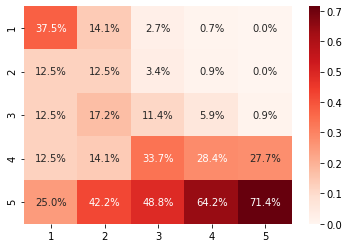

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sn

cf_matrix = pd.DataFrame(confusion_matrix(df_rev['rating'],df_rev['pred_vader']), 
                         index = [i for i in range(1,6)], columns = [i for i in range(1,6)])
sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.1%', cmap='Reds')

So far, we have used rule-based methods to predict rating. However, another class of methods are feature-based. 

In [29]:
# adjusted from https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score

class LogisticRegressionSentiment():
    """Predict fine-grained sentiment scores using a sklearn Logistic Regression pipeline."""
    def __init__(self, model_file: str=None) -> None:
        super().__init__()
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from sklearn.linear_model import LogisticRegression
        from sklearn.pipeline import Pipeline
        self.pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear', multi_class='auto')),
            ]
        )
        
    def predict(self, train_file: str, test_file: str, lower_case: bool=False) -> pd.DataFrame:
        "Train model using sklearn pipeline"
        train_df = train_file[['text','truth']]
        learner = self.pipeline.fit(train_df['text'].str.lower(), train_df['truth'].astype(int))
        # Predict class labels using the learner and output DataFrame
        test_df = test_file[['text','truth']]
        test_df['pred'] = learner.predict(test_df['text'].str.lower())
        return test_df

In [30]:
# 70% is used to train, 30% of the data is used to test
from sklearn.model_selection import train_test_split
X = df_sent['sentence']
y = df_sent['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
train_file = pd.DataFrame({'truth': y_train, 'text': X_train})
test_file = pd.DataFrame({'truth': y_test, 'text': X_test})
logsentiment = LogisticRegressionSentiment()
logsentiment.predict(train_file, test_file)

C:\Users\MP\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,text,truth,pred
6514,Excellent for 'gezellig lunchen - delicious d...,5,5
3773,Take time and walk through every greenhouse,5,5
709,Our airbnb host said this is the best pizza in...,5,5
449,This tucked away restaurant in Amsterdam s cit...,5,5
103,I was hungry,5,5
...,...,...,...
1825,The Eggs Benedict was delicious - it was on ...,5,5
2195,The burger was yummy (15€ \n Ambiance nice ...,5,5
1296,The food is creative and excellent,5,5
5570,it s so good,5,5


In [40]:
print(Counter(logsentiment.predict(train_file, test_file).pred)) # 82 are predicted as 4 stars
print(Counter(logsentiment.predict(train_file, test_file).truth)) # while in reality 264 have 4 stars

C:\Users\MP\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Counter({5: 825, 4: 82})
Counter({5: 538, 4: 264, 3: 66, 2: 21, 1: 18})


C:\Users\MP\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


As you can see, a logistic regression is inclined to assign all instances to a majority class (as this dataset is very unbalanced - many reviews with 5 stars). We have used a simple tf-idf approach to represent the sentences. However, in a similar way you could use Naive Bayes or Support Vector Machines to predict the ratings and use laplace smoothing as an input to the model. See below for an example on Laplace smoothing (by Laurence).

C:\Users\MP\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\MP\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Consider the three probability vectors: 
 The data distribution; 
 [0.026420079260237782, 0.028401585204755615, 0.07661822985468957, 0.28731836195508587, 0.5812417437252312] 
 validation actual labels distribution; 
 [0.020833333333333332, 0.02412280701754386, 0.07346491228070176, 0.2905701754385965, 0.5910087719298246] 
 validation predicted labels distribution; 
 [0.0010964912280701754, 0.0010964912280701754, 0.0010964912280701754, 0.09100877192982457, 0.9057017543859649].
Which could be visualised as: 
   Data distribution  Truth distribution  Prediction distribution
1           0.026420            0.020833                 0.001096
2           0.028402            0.024123                 0.001096
3           0.076618            0.073465                 0.001096
4           0.287318            0.290570                 0.091009
5           0.581242            0.591009                 0.905702


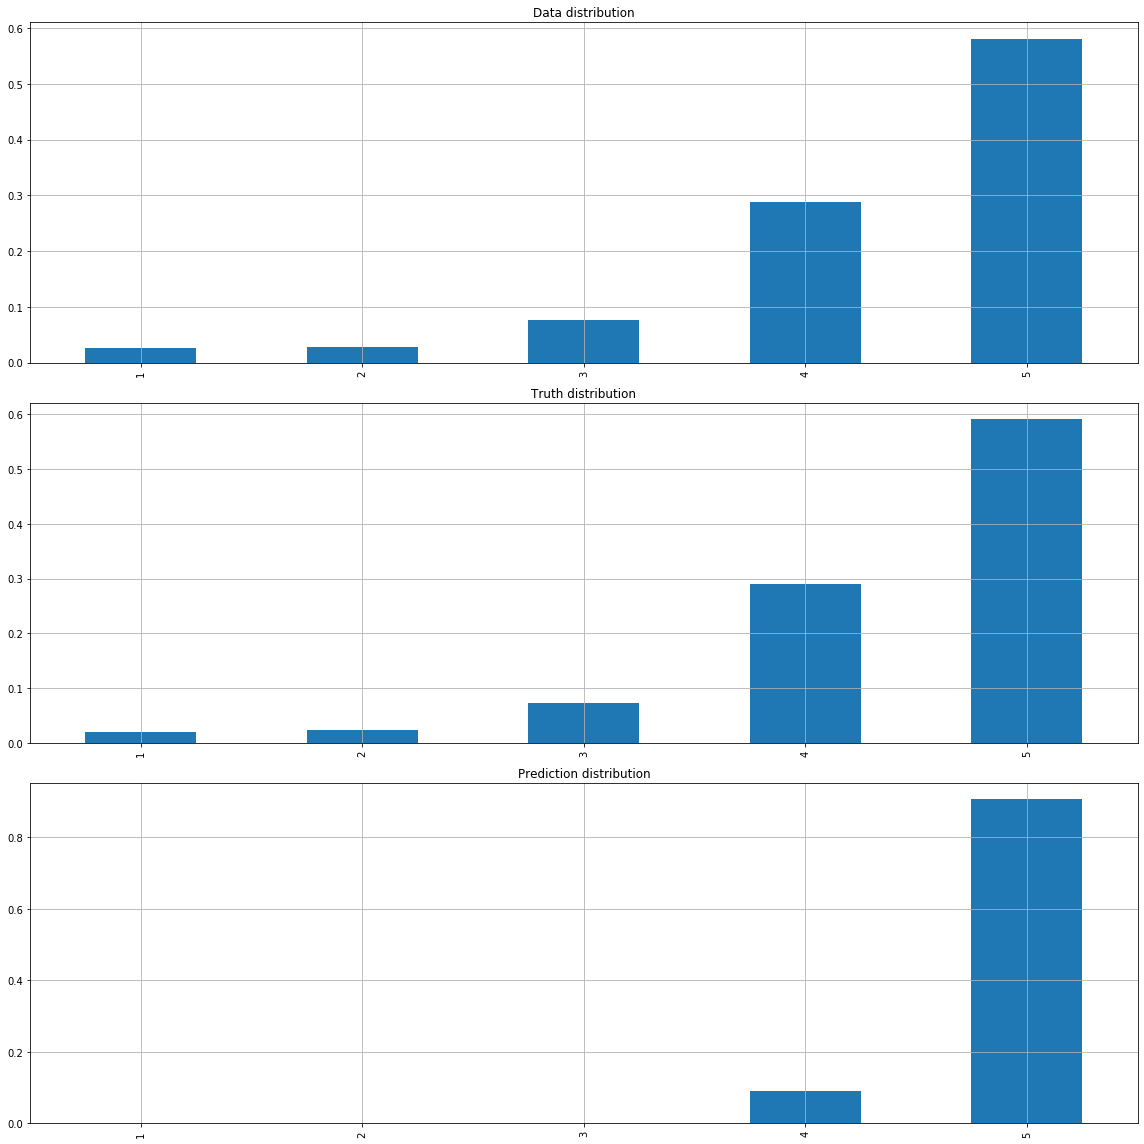

In [104]:
# aquire vector where every column represents smoothed probability given the truth
# aquire vector where every column represents smoothed probability given the predictions
c_pred = Counter(logsentiment.predict(train_file, test_file).pred)
c_truth = Counter(logsentiment.predict(train_file, test_file).truth)
c_data = Counter(df_sent['rating'])

pred_vector = [(c_pred[x] + 1)/(sum(c_pred.values()) + 5) for x in range(1,6)]
truth_vector = [(c_truth[x] + 1)/(sum(c_truth.values()) + 5) for x in range(1,6)]
data_vector = [(c_data[x] + 1)/(sum(c_data.values()) + 5) for x in range(1,6)]

print(f"Consider the three probability vectors: \n The data distribution; \n {data_vector} \n validation actual labels distribution; \n {truth_vector} \n validation predicted labels distribution; \n {pred_vector}.")
print("Which could be visualised as: ")

df = pd.DataFrame(data = [data_vector, truth_vector, pred_vector], columns = ['1', '2', '3', '4', '5'], 
                  index = ["Data distribution", "Truth distribution", "Prediction distribution"]).T
print(df)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,16))
df["Data distribution"].plot(ax=axes[0], kind='bar', grid=True, title = "Data distribution")
df["Truth distribution"].plot(ax=axes[1], kind='bar', grid=True, title = "Truth distribution",)
df["Prediction distribution"].plot(ax=axes[2], kind='bar', grid=True, title = "Prediction distribution")

fig.tight_layout()

We can clearly see that the data distribution and the truth distribution are very similair which makes sense since the truth distribution essentially is a sub set drawn from the real data. However, the prediction distribution is skewed towards the right and essentially has no data points for the first three categories, the only reason they have some value is due to the smoothing to ensure mathematical stability.

---

## Cross-entropy
To evaluate your model cross entropy is able to compare various probability distributions. The cross-entropy quantifies how similar two distributions are. The entropy can also be calculated of one distribution, in that case, entropy quantifies the uncertainty involved when encountering a random variable. 
\begin{equation*}
     H({\tilde{p}},q)=-\sum_{i=1}^{N}{\tilde {p}}(x)\log _{2}q(x_{i}) 
\end{equation*}
Cross-entropy builds upon the idea of entropy from information theory and calculates the number of bits required to represent or transmit an average event from one distribution compared to another distribution. It is simply the ratio of the entropy of two distributions: $H(P/Q)$ where $P$ might be the observed distribution and $Q$ the predicted distribution. The closer $H(P)$ is to $H(P/Q)$, the better $H(Q)$ is an approximation of $H(P)$.

For a derivation of the cross-entropy in logistic regression, please see: https://peterroelants.github.io/posts/cross-entropy-logistic/

In [103]:
# calculate the entropy for the estimated probabilities
from math import log2
entropy_data = - sum([data_vector[i] * log2(data_vector[i]) for i in range(len(data_vector))])
print('entropy: %.3f bits' % entropy_data)

# calculate entropy for target probabilities
entropy_target = - sum([truth_vector[i] * log2(truth_vector[i]) for i in range(len(truth_vector))])
print('entropy: %.3f bits' % entropy_target)

# calculate cross entropy
cross_entropy = entropy_target/entropy_data
print('cross entropy: %.3f bits' % cross_entropy)

entropy: 1.540 bits
entropy: 1.489 bits
cross entropy: 0.967 bits


Note that we use the base of 2. If the base of the logarithm is e, the entropy is measured in nats. Unless otherwise specified, we will take all logarithms to base 2, and hence all the entropies will be measured in bits.

In [107]:
from scipy.stats import entropy
print(entropy(data_vector, base=2))
# When using the entropy function from scipy we compute the KL-divergence between the two given vectors
# If qk is not None, then compute the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=axis).
print(f"The KL-divergence value between the data and the truth is {entropy(data_vector, truth_vector, base=2)} which is very close to 0")
print(f"Now consider the KL-divergence value between the data and the prediction: {entropy(data_vector, pred_vector, base=2)} That's already a lot higher!")

1.5403397188137484
The KL-divergence value between the data and the truth is 0.0017526649246738847 which is very close to 0
Now consider the KL-divergence value between the data and the prediction: 0.8286530909355219 That's already a lot higher!


This all makes sense as we expect the first KL-divergence to be closer to 0 while the latter KL-divergence value is expected to have a significantly higher value compared to the first value. KL-divergence values are best used relatively or in a comparison. Concluding; two vectors are very similair (value close to 0) or definitely not (further away from 0). We note that the prediction vector is not as similair to the real data as the truth vector, we can thus conclude that our model is not making predictions according to the distribution of the data.

---

Entropy is a measure of information on a distribution. However, words in sequence can also be regarded as an outcome of a distribution. The language in this case determines the distribution. This means that you can use the probabilities found for certain words in the vocabulary to calculate the entropy of a sentence. If a language is thought of as a stochastic process that produces
 a sequence of words, its entropy rate is defined as (Jurasfky and Martin, 2009):
 
\begin{equation*}
\begin{aligned}
    H(w_{1}w_{2}...w_{n}) & = -\sum_{ w_{1}...w_{n}} {P}{w_{1}...w_{n}}\log _{2}{P}(w_{n}\vert w_{1}...w_{n-1}) \\
    & =-\sum_{ w_{1}...w_{n}} {P}{w_{1}...w_{n}}\log _{2}{P}(w_{1}...w_{n}) \\ 
    & + \sum_{w_{1}...w_{n-1}} {P}{w_{1}...w_{n-1}}\log _{2}{P}(w_{1}...w_{n-1}) 
\end{aligned}
\end{equation*}

The assumption underlying entropy is an infinite possibilities of distributions. To measure the true entropy of a language (i.e. vocabulary) we need to consider sequences of infinite length. In other words, to get the true probabilities of words in sequences given the language contains many uncertainties.

## Next notebook
So far we have illustrated how text analysis evolved from linguistic rules, to counting frequencies to more advanced modeling approaches. The downside of all these approaches is that the ordering of words is most often ignored. An alternative method that do measure linguistic meaning captured in the ordering of words within a document or sentence are embeddings. This will be discussed in week 4.

---